In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Visualization
import seaborn as sns

# SMOTE
#from imblearn.over_sampling import SMOTE

# Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Scoring
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Split
from sklearn.model_selection import train_test_split

# Encoding
from sklearn.preprocessing import LabelEncoder


In [8]:
df = pd.read_csv(r"D:\DAIICT\Semester VI\Deep Learning (IT-549)\Lab Assignments\Lab 5\heart.csv")

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.shape

(918, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

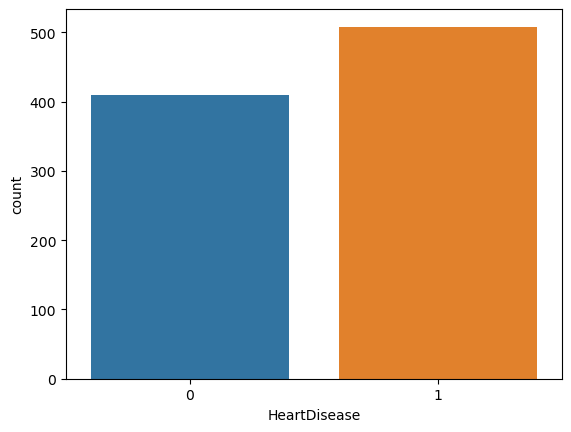

In [14]:
sns.countplot(x = 'HeartDisease', data = df)

In [15]:
df.corrwith(df['HeartDisease'])

C:\Users\dell8\AppData\Local\Temp\ipykernel_16940\1540573642.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['HeartDisease'])


Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

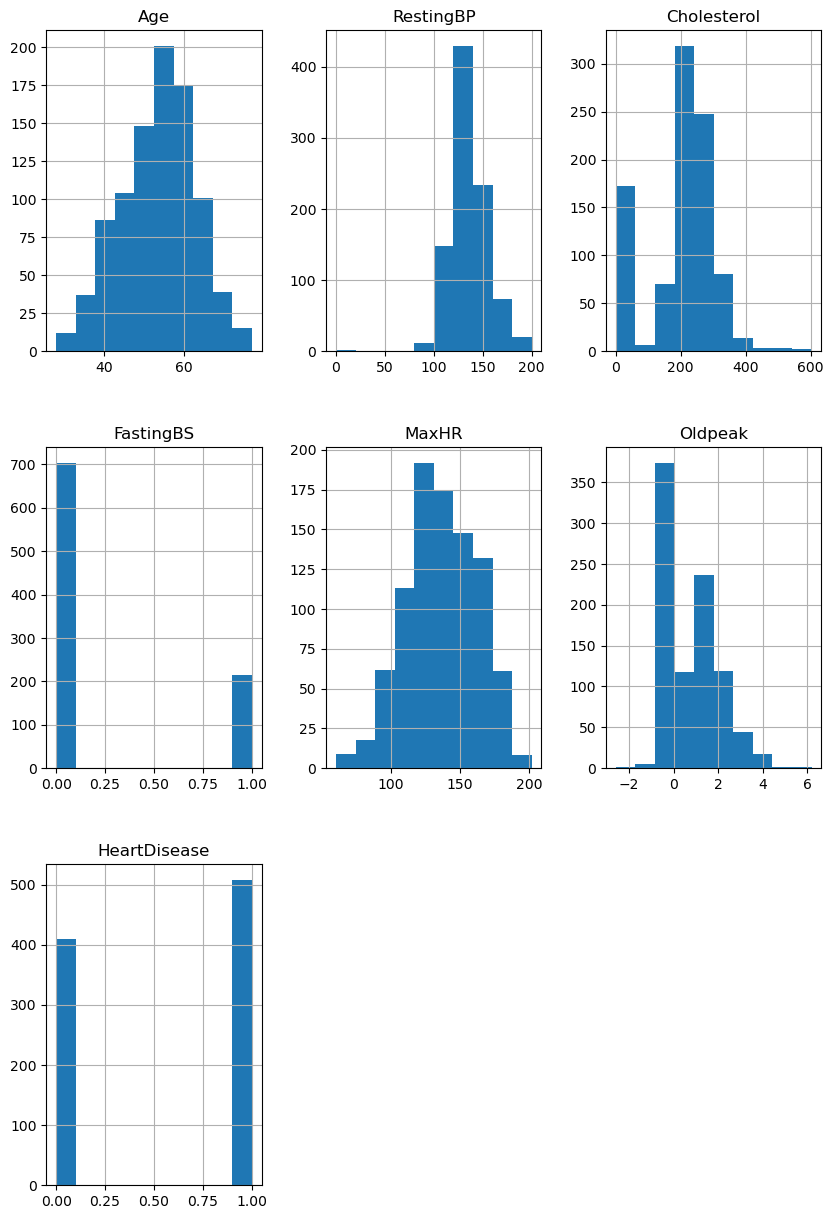

In [16]:
df.hist(figsize = (10, 15))

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
le = LabelEncoder()

In [19]:
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [21]:
# One Hot Encoding 
df = pd.get_dummies(df, columns = ["ChestPainType", "RestingECG", "ST_Slope"])

In [22]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [23]:
X = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
y_train.value_counts()

1    401
0    333
Name: HeartDisease, dtype: int64

In [26]:
scalar = StandardScaler()

X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test)

In [27]:
model = Sequential ()
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))

In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])

In [29]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 32, epochs = 500)

Epoch 1/500


23/23 [==============================] - 2s 13ms/step - loss: 16.8647 - Accuracy: 0.5136 - val_loss: 2.5283 - val_Accuracy: 0.5163
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 12.6787 - Accuracy: 0.5327 - val_loss: 0.9171 - val_Accuracy: 0.6630
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 10.2800 - Accuracy: 0.5463 - val_loss: 2.4672 - val_Accuracy: 0.5978
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 8.9903 - Accuracy: 0.5259 - val_loss: 2.8505 - val_Accuracy: 0.5815
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 6.5792 - Accuracy: 0.5450 - val_loss: 1.8422 - val_Accuracy: 0.5652
Epoch 6/500
23/23 [==============================] - 0s 5ms/step - loss: 4.7005 - Accuracy: 0.5722 - val_loss: 1.7688 - val_Accuracy: 0.5598
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 3.4021 - Accuracy: 0.5668 - val_loss: 1.0335 - val_Accuracy: 0.5489
Epoch 8/500
23/23 [==

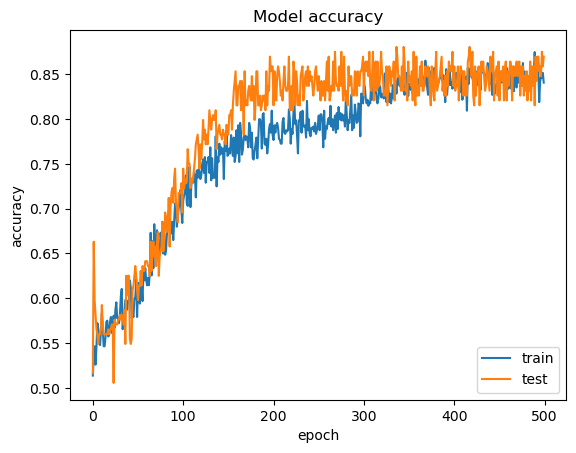

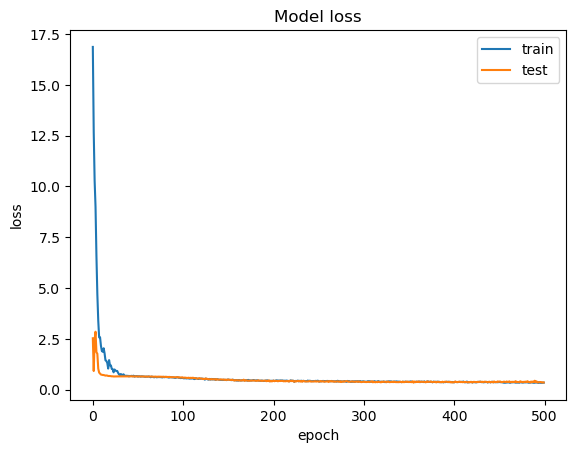

In [30]:
# summarize history for acc
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [31]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_Accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['Accuracy'])*100), '%')

Max val_acc achieved: 88.04 %
Max acc achieved: 87.47 %


In [32]:
print('Final val_acc achieved: %.2f' %(history.history['val_Accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['Accuracy'][-1]*100), '%')

Final val_acc achieved: 86.96 %
Final acc achieved: 84.06 %


In [33]:
val_accuracy = np.mean(history.history['val_Accuracy'])
print("\n%s: %.2f%%" % ('Mean of validation accuracy', val_accuracy*100))


Mean of validation accuracy: 79.12%


In [34]:
#Evaluation 

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 1ms/step


In [35]:
ann_cm = confusion_matrix(y_test, y_pred)
ann_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print(ann_cm)
print(ann_acc, '%')

[[64 13]
 [20 87]]
82.07 %


In [36]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.83      0.76      0.80        84
        True       0.81      0.87      0.84       100

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

